# The matplotlib library

## Importing the datascience libraries

```matplotlib``` is an abbreviation for the matrix plotting library. Normally ```numpy``` is imported alongside ```matplotlib``` as ```ndarray``` instances are used to store data for plotting. The three letter alias ```mpl``` is typically used for ```matplotlib``` and the ```pyplot``` module is normally imported using the three letter alias ```plt```:

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

The version can be determined using the datamodel attribute ```__version__```:

In [2]:
mpl.__version__

'3.8.2'

The custom function ```print_identifier_group``` can be imported:

In [3]:
from helper_module import print_identifier_group

And used to examine the identifiers of the ```mpl``` library:

In [4]:
print_identifier_group(mpl, kind='all', exclude_std=True)

datamodel attribute: ['__all__', '__bibtex__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']
datamodel method: ['__getattr__']
constant: []
attribute: ['artist', 'axes', 'axis', 'backend_bases', 'backend_managers', 'backend_tools', 'bezier', 'category', 'cbook', 'cm', 'collections', 'color_sequences', 'colorbar', 'colors', 'container', 'contour', 'dates', 'defaultParams', 'dviread', 'figure', 'font_manager', 'ft2font', 'gridspec', 'hatch', 'image', 'inspect', 'layout_engine', 'legend', 'legend_handler', 'lines', 'logging', 'markers', 'mathtext', 'mlab', 'numpy', 'offsetbox', 'patches', 'path', 'projections', 'pyplot', 'quiver', 'rcParams', 'rcParamsDefault', 'rcParamsOrig', 'rcsetup', 'scale', 'spines', 'stackplot', 'streamplot', 'style', 'sys', 'table', 'texmanager', 'text', 'textpath', 'ticker', 'transforms', 'tri', 'units', 'widgets']
method/function: ['colormaps', 'cycler', 'get_backend', 'get_cachedir', 'get_c

The ```mpl``` library has a large number of modules, many of the modules are Python standard libraries which are used internally by ```mpl``` functions and have been excluded in the output above. ```mpl``` also uses third-party libraries such as ```numpy``` internally. When ```np``` is used by the end user, it is typically imported separately using the alias ```np```:

```python
import numpy as np
```

Although the following would be equivalent, it is not typically accessed the long way via ```mpl```:

```python
import matplotlib.numpy as np
```

The ```ndarray``` is used as the default datastructure for simple plots. The simple plots use a 1D ```ndarray``` however more advanced plots are configured to use higher dimension ```ndarray``` instances.

A simple plot requires ```y``` values measured at respect to ```x``` values. ```y``` is known as the dependent variable and ```x``` is known as the dependent variable. Notice that the independent ```x``` measurements are taken at linearly spaced intervals. The ```y``` values taken at these values of ```x``` have some associated error:

In [26]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0.001, 2.001, 3.999, 5.999, 8.002, 10.001])

```mpl``` was originally a Python plotting library based on MATLAB. During early development there were ```mlab``` and ```pylab``` modules which had function names equivalent to functions found in MATLAB. Functions from these modules were typically imported into the global namespace and used like they are in MATLAB however importing all the functions in the global namespace and overriding the ```builtins``` functions is considered bad practice and goes against the Object Orientated Programming Principles (OOP) commonly adopted in Python. The Python plot ```pyplot``` module updated most of these plotting functions using OOP principles. The ```pyplot``` module is imported using the alias ```plt``` and now that the ```mpl``` library is mature is the main module used. The ```mlab``` module now only contains a small number of specialised function for spectral computations and kernel density estimations that aren't yet incorporated into ```pyplot```.

The identifiers for the ```pyplot``` module can be examined:

In [7]:
print_identifier_group(plt, kind='all', exclude_std=True)

datamodel attribute: ['__annotations__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__']
datamodel method: []
constant: ['TYPE_CHECKING']
attribute: ['annotations', 'cbook', 'cm', 'color_sequences', 'matplotlib', 'mlab', 'np', 'rcParams', 'rcParamsDefault', 'rcParamsOrig', 'rcsetup', 'style']
method/function: ['acorr', 'angle_spectrum', 'annotate', 'arrow', 'autoscale', 'autumn', 'axes', 'axhline', 'axhspan', 'axis', 'axline', 'axvline', 'axvspan', 'bar', 'bar_label', 'barbs', 'barh', 'bone', 'box', 'boxplot', 'broken_barh', 'cast', 'cla', 'clabel', 'clf', 'clim', 'close', 'cohere', 'colorbar', 'colormaps', 'connect', 'contour', 'contourf', 'cool', 'copper', 'csd', 'cycler', 'delaxes', 'disconnect', 'draw', 'draw_all', 'draw_if_interactive', 'ecdf', 'errorbar', 'eventplot', 'figaspect', 'figimage', 'figlegend', 'fignum_exists', 'figtext', 'figure', 'fill', 'fill_between', 'fill_betweenx', 'findobj', 'flag', 'gca', 'gcf', 'gci', 

The most important classes are ```plt.Figure``` and ```plt.Axes```:

In [18]:
print_identifier_group(plt.Figure, kind='all')

datamodel attribute: ['__dict__', '__doc__', '__module__', '__weakref__']
datamodel method: ['__class__', '__delattr__', '__dir__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__']
constant: []
attribute: ['axes', 'dpi', 'frameon', 'mouseover', 'stale', 'sticky_edges', 'zorder']
method/function: ['add_artist', 'add_axes', 'add_axobserver', 'add_callback', 'add_gridspec', 'add_subfigure', 'add_subplot', 'align_labels', 'align_xlabels', 'align_ylabels', 'autofmt_xdate', 'clear', 'clf', 'colorbar', 'contains', 'convert_xunits', 'convert_yunits', 'delaxes', 'draw', 'draw_artist', 'draw_without_rendering', 'figimage', 'findobj', 'format_cursor_data', 'gca', 'get_agg_filter', 'get_alpha', 'get_animated', 'get_axes', 'get_children', 'get_clip_box', 'get_clip_on

In [19]:
print_identifier_group(plt.Axes, kind='all')

datamodel attribute: ['__dict__', '__doc__', '__module__', '__weakref__']
datamodel method: ['__class__', '__delattr__', '__dir__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__']
constant: []
attribute: ['artists', 'axes', 'collections', 'images', 'lines', 'mouseover', 'name', 'patches', 'stale', 'sticky_edges', 'tables', 'texts', 'use_sticky_edges', 'viewLim', 'zorder']
method/function: ['acorr', 'add_artist', 'add_callback', 'add_child_axes', 'add_collection', 'add_container', 'add_image', 'add_line', 'add_patch', 'add_table', 'angle_spectrum', 'annotate', 'apply_aspect', 'arrow', 'autoscale', 'autoscale_view', 'axhline', 'axhspan', 'axis', 'axline', 'axvline', 'axvspan', 'bar', 'bar_label', 'barbs', 'barh', 'boxplot', 'broken_barh', 'bxp', 'can_pan'

These classes are typically not instantiated directly. The ```pyplot``` factory function ```plt.figure``` is used to create a ```plt.Figure``` instance:

In [24]:
plt.figure?

Signature:
plt.figure(
    num: 'int | str | Figure | SubFigure | None' = None,
    figsize: 'tuple[float, float] | None' = None,
    dpi: 'float | None' = None,
    *,
    facecolor: 'ColorType | None' = None,
    edgecolor: 'ColorType | None' = None,
    frameon: 'bool' = True,
    FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>,
    clear: 'bool' = False,
    **kwargs,
) -> 'Figure'
Docstring:
Create a new figure, or activate an existing figure.

Parameters
----------
num : int or str or `.Figure` or `.SubFigure`, optional
    A unique identifier for the figure.

    If a figure with that identifier already exists, this figure is made
    active and returned. An integer refers to the ``Figure.number``
    attribute, a string refers to the figure label.

    If there is no figure with the identifier or *num* is not given, a new
    figure is created, made active and returned.  If *num* is an int, it
    will be used for the ``Figure.number`` attribute, otherwise, an


Notice that this factory function returns a ```plt.Figure```. 

There are generally 2 approaches, a functional approach where the current ```plt.Figure``` is not assigned to an instance name during instantiation and is instead updated using a series of functions from the ```plt```. For example:

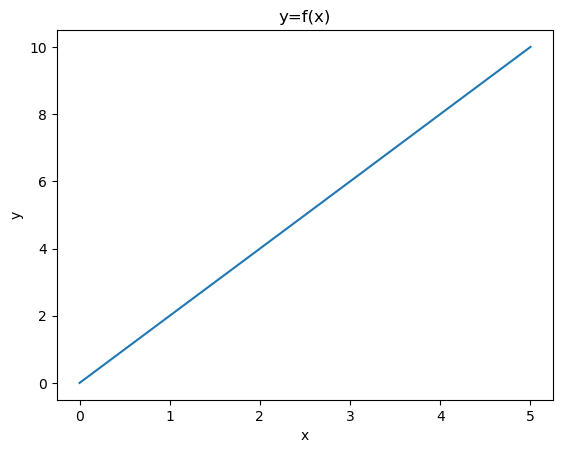

In [27]:
plt.figure()
plt.subplot(1, 1, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=f(x)')
plt.plot(x, y)

Alternatively an OOP design approach is used:

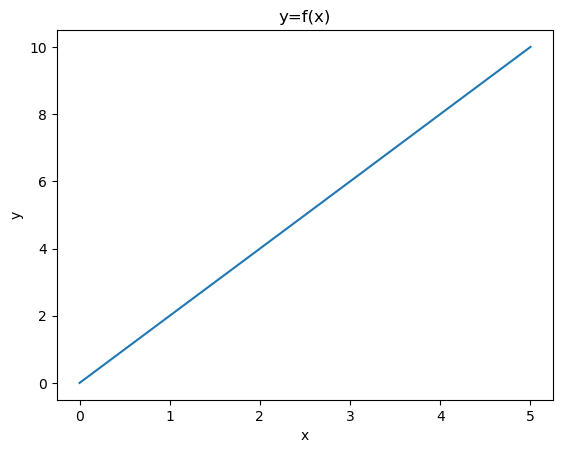

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x_text = ax.set_xlabel('x')
y_text = ax.set_ylabel('y')
title_text = ax.set_title('y=f(x)')
line_list = ax.plot(x, y)

Notice in the OOP design approach that the ```Axes``` is added using the ```Figure``` method ```add_subplot```. The labels are added to the ```Axes``` using the ```Axes``` methods ```set_xlabel```, ```set_ylabel``` and ```set_title``` respectively. These methods are similar to the ```plt``` functions ```xlabel```, ```ylabel``` and ```title``` which operate on the currently selected ```Axes```.

Each plotting function from ```plt``` is also available as an ```Axes``` method with the same name. The class type of all the instances above can be examined:

In [36]:
print(f'{fig}: {type(fig)}')
print(f'{ax}: {type(ax)}')
print(f'{x_text}: {type(x_text)}')
print(f'{y_text}: {type(y_text)}')
print(f'{title_text}: {type(title_text)}')
print(f'{line_list}: {type(line_list)}')
print(f'{line_list[0]}: {type(line_list[0])}')

Figure(640x480): <class 'matplotlib.figure.Figure'>
Axes(0.125,0.11;0.775x0.77): <class 'matplotlib.axes._axes.Axes'>
Text(0.5, 24.0, 'x'): <class 'matplotlib.text.Text'>
Text(24.000000000000007, 0.5, 'y'): <class 'matplotlib.text.Text'>
Text(0.5, 1.0, 'y=f(x)'): <class 'matplotlib.text.Text'>
[<matplotlib.lines.Line2D object at 0x00000219F1354D40>]: <class 'list'>
Line2D(_child0): <class 'matplotlib.lines.Line2D'>


Notice when the functional approach is used, the return value of the last line in the cell is shown in the cell output above the plot:

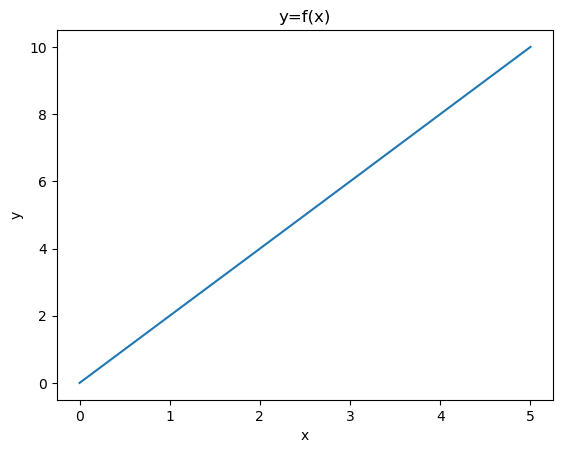

In [37]:
plt.figure()
plt.subplot(1, 1, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=f(x)')
plt.plot(x, y)

This can be suppressed by use of a semicolon at the end of the last line:

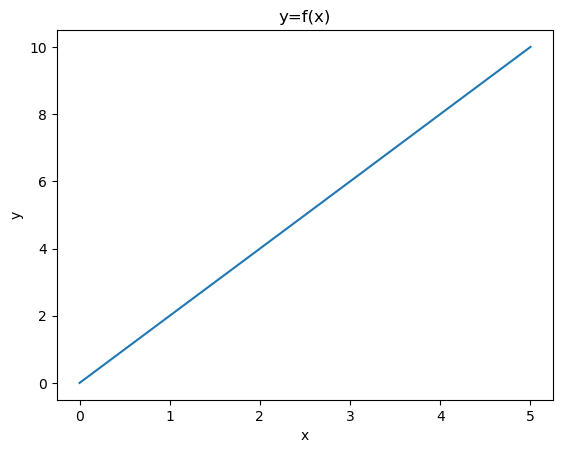

In [38]:
plt.figure()
plt.subplot(1, 1, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=f(x)')
plt.plot(x, y);

The ```figure``` function is a factory function for creating a ```Figure``` instance. There is a complementary ```subplots``` function which creates both a ```Figure``` and ```Axes``` instance. In other words the following are equivalent:

Figure(640x480): <class 'matplotlib.figure.Figure'>
[<Axes: > <Axes: >]: <class 'numpy.ndarray'>


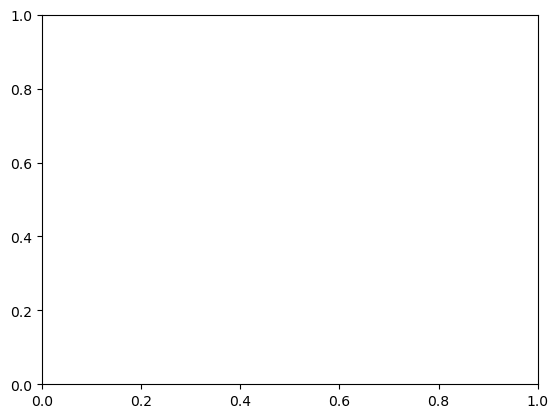

In [48]:
print(f'{fig}: {type(fig)}')
print(f'{ax}: {type(ax)}')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

Figure(640x480): <class 'matplotlib.figure.Figure'>
Axes(0.125,0.11;0.775x0.77): <class 'matplotlib.axes._axes.Axes'>


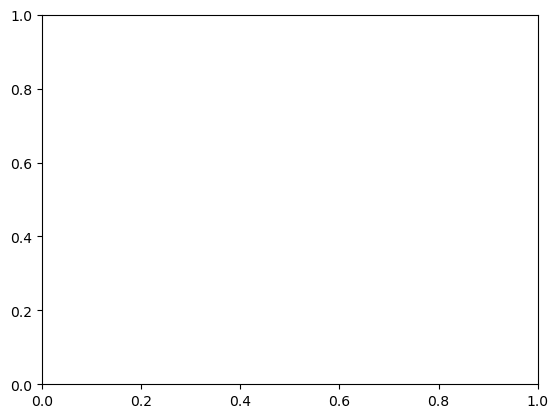

In [39]:
fig, ax = plt.subplots()
print(f'{fig}: {type(fig)}')
print(f'{ax}: {type(ax)}')

The factory function ```plt.subplots``` takes in consistent keyword input arguments to ```plt.Figure```, for example ```num``` which can be used to specify the ```Figure``` number. Normally each ```Figure``` instance has an ```int``` ```Figure``` number which is automatically assigned from 1 (first order indexing). This number is restarted for each cell output in an IPython cell.

The factory function ```plt.subplots``` also has keyword input arguments to specify the number of subplots to add. Notice when a single ```Axes``` is specified using ```nrows=1``` (default) by ```ncols=1``` (default) the return value is a single ```Axes``` instance. When a 1d array of ```Axes``` is specified, the return value is a 1D ```ndarray``` of ```Axes``` instances. When a 2d array of ```Axes``` is specified, the return value is a 2D ```ndarray```. Because these are ```ndarray``` instances they can be indexed into using zero-order indexing:

Figure(640x480): <class 'matplotlib.figure.Figure'>
[<Axes: > <Axes: >]: <class 'numpy.ndarray'>
Figure(640x480): <class 'matplotlib.figure.Figure'>
[<Axes: > <Axes: > <Axes: >]: <class 'numpy.ndarray'>


Figure(640x480): <class 'matplotlib.figure.Figure'>
[[<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]]: <class 'numpy.ndarray'>


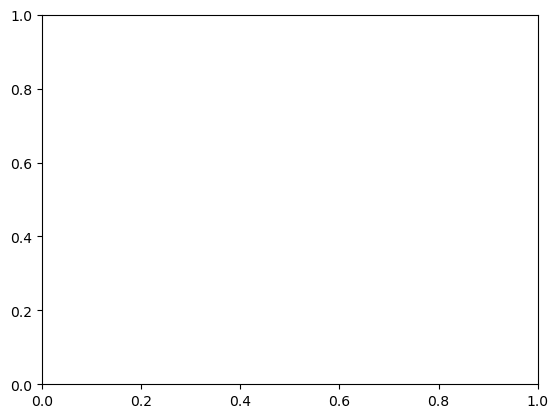

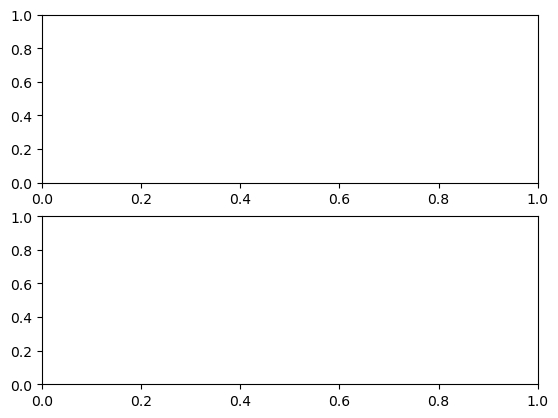

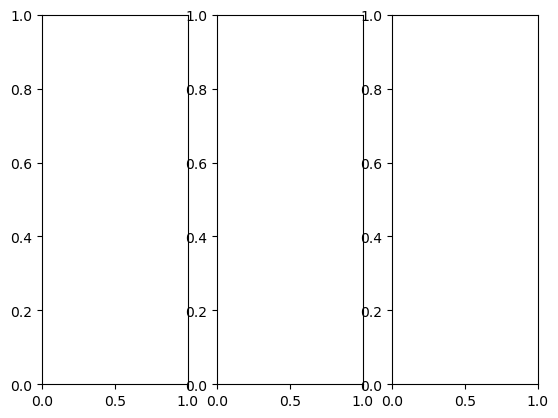

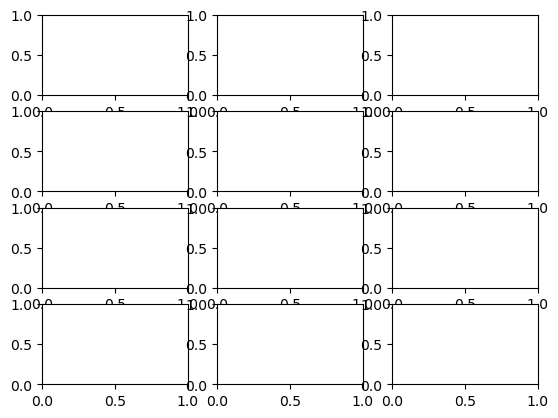

In [52]:
fig1, ax1 = plt.subplots(num=1)

fig2, ax2 = plt.subplots(num=2, nrows=2, ncols=1)
print(f'{fig2}: {type(fig2)}')
print(f'{ax2}: {type(ax2)}')

fig3, ax3 = plt.subplots(num=3, nrows=1, ncols=3)
print(f'{fig3}: {type(fig3)}')
print(f'{ax3}: {type(ax3)}')

fig4, ax4 = plt.subplots(num=4, nrows=4, ncols=3)
print(f'{fig4}: {type(fig4)}')
print(f'{ax4}: {type(ax4)}')

Having the ```Figure``` and ```Axes``` instances instantiated to instance names means they can be indexed into to select an ```Axes``` and then an ```Axes``` method such as a plotting function can be used:

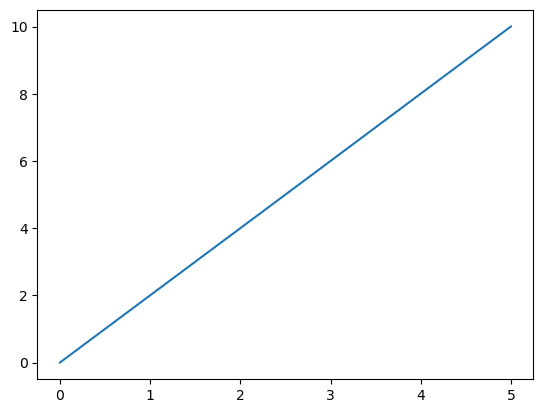

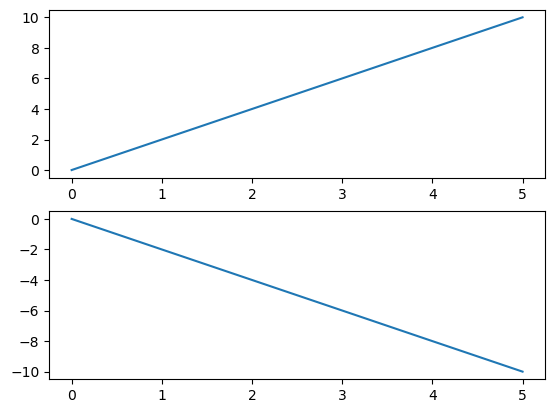

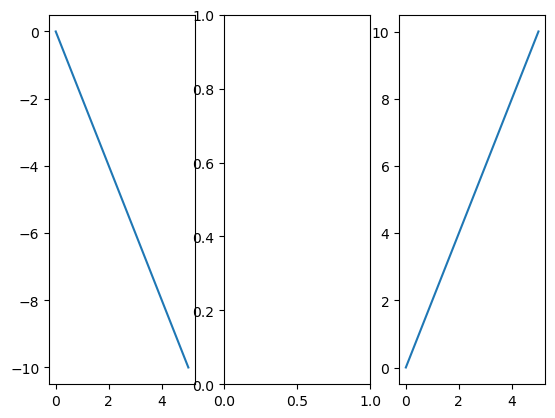

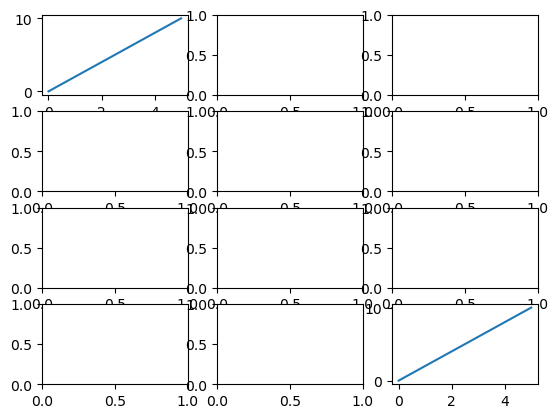

In [57]:
fig1, ax1 = plt.subplots()

fig2, ax2 = plt.subplots(nrows=2, ncols=1)

fig3, ax3 = plt.subplots(nrows=1, ncols=3)

fig4, ax4 = plt.subplots(nrows=4, ncols=3)

ax1.plot(x, y)
ax2[0].plot(x, y)
ax2[1].plot(x, -y)
ax3[0].plot(x, -y)
ax3[2].plot(x, y)
ax4[0, 0].plot(x, y)
ax4[3, 2].plot(x, y)

The function ```plt.subplot``` has the positional input arguments ```nrow```, ```ncol``` and ```index```. For the index first-order indexing is used. Typically each subplot is selected and then the ```plt``` plotting functions for example can be used to create a plot. Notice that ```plt.subplot``` can be used to reselect a subplot and so the last line is added to the first subplot:

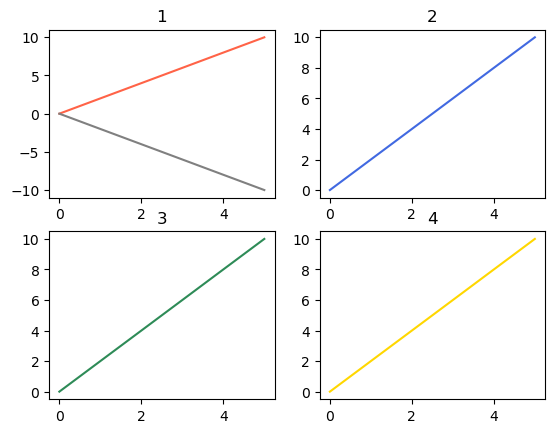

In [66]:
plt.figure()
plt.subplot(2, 2, 1)
plt.title('1')
plt.plot(x, y, color='tomato')

plt.subplot(2, 2, 2)
plt.title('2')
plt.plot(x, y, color='royalblue')

plt.subplot(2, 2, 3)
plt.title('3')
plt.plot(x, y, color='seagreen')

plt.subplot(2, 2, 4)
plt.title('4')
plt.plot(x, y, color='gold')

plt.subplot(2, 2, 1)
plt.plot(x, -y, color='gray')

If the functional approach was initially used the ```plt.gcf``` (get current Figure) function can be used to assign the currently selected ```Figure``` for assignment to an instance name. Once the ```Figure``` is selected there is a ```Figure``` method ```gca``` (get current Axes) or function ```plt.gca``` which can be used for assignment of an ```Axes``` to an instance name.

The ```Figure``` has an ```ax``` attribute which is (always) a ```list``` of ```Axes``` instances and this can be indexed into to access an ```Axes```. Each time a new ```Axes``` is added to the ```Figure``` it is appended to this ```list```, in other words the ```list``` follows the insertion order.

The ```Axes``` also has a ```figure``` attribute which can be used to instantiate a ```Figure```.


Figure(640x480): <class 'matplotlib.figure.Figure'>
Axes(0.125,0.11;0.775x0.77): <class 'matplotlib.axes._axes.Axes'>

[<Axes: title={'center': '1'}>]: <class 'list'>

Figure(640x480): <class 'matplotlib.figure.Figure'>


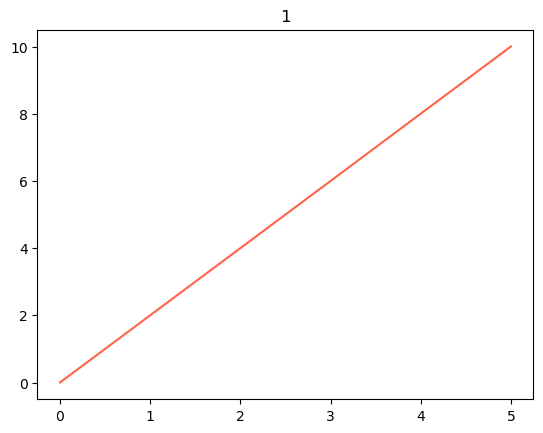

In [81]:
plt.figure()
plt.title(1)
plt.subplot(1, 1, 1)
plt.plot(x, y, color='tomato')

fig = plt.gcf()
ax = fig.gca()
print(f'{fig}: {type(fig)}')
print(f'{ax}: {type(ax)}')
print()
print(f'{fig.axes}: {type(fig.axes)}')
print()
print(f'{ax.figure}: {type(ax.figure)}')

A ```Figure``` can be reselected using the ```figure``` function, alongside an existing ```num```. Note the first ```Figure``` with ```num=1``` is created, then the ```Figure``` with ```num=2``` is created. then the ```Figure``` with ```num=3``` is created and finally the ```Figure``` with ```num=1``` is updated. The ```Figure``` instances get displayed in the cell output using the order of the last modification time which is why the ```Figure``` with ```num=1``` is at the bottom:

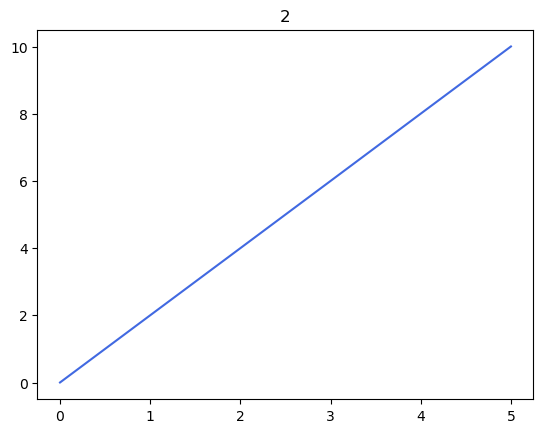

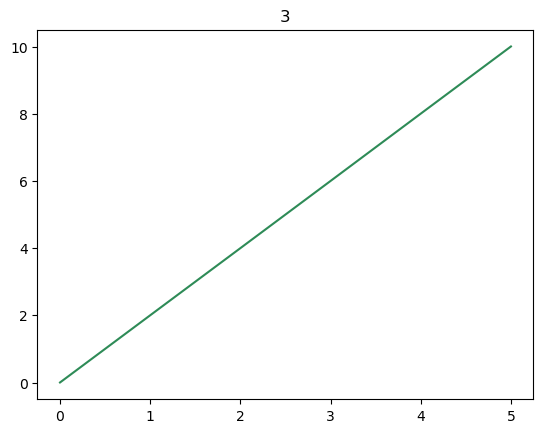

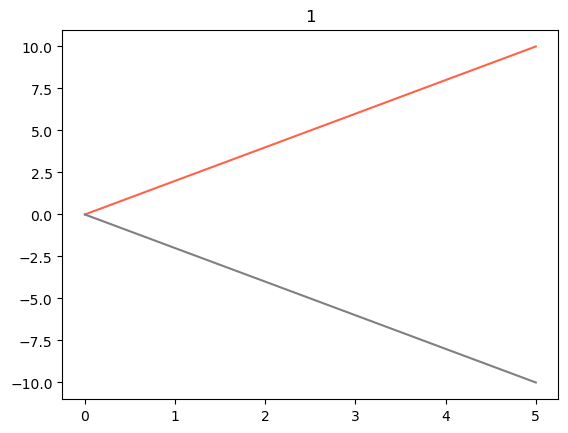

In [82]:
plt.figure()
plt.title(1)
plt.subplot(1, 1, 1)
plt.plot(x, y, color='tomato')

plt.figure()
plt.title(2)
plt.subplot(1, 1, 1)
plt.plot(x, y, color='royalblue')

plt.figure()
plt.title(3)
plt.subplot(1, 1, 1)
plt.plot(x, y, color='seagreen')

fig = plt.figure(num=1)
ax = fig.gca()
ax.plot(x, -y, color='gray')

The ```Figure``` class has the method ```subplots``` which behaves similar to the ```plt.subplots``` but is bound to the existing ```Figure``` instance. This creates an ```ndarray``` of ```Axes``` which can be indexed:

Figure(640x480): <class 'matplotlib.figure.Figure'>
[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]: <class 'numpy.ndarray'>


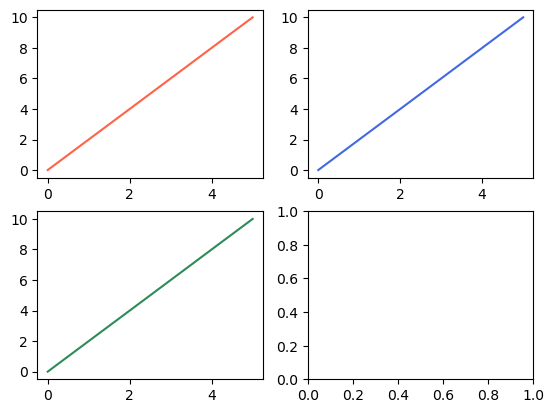

In [120]:
fig = plt.figure()
ax = fig.subplots(nrows=2, ncols=2)
print(f'{fig}: {type(fig)}')
print(f'{ax}: {type(ax)}')

ax[0, 0].plot(x, y, color='tomato');
ax[1, 0].plot(x, y, color='seagreen');
ax[0, 1].plot(x, y, color='royalblue');

The ```Figure``` class has the method ```subplot_mosaic``` which can be used to create a label for each ```Axes```. This creates an ```dict``` of ```Axes``` where the label is the ```key``` and can be used to index into the ```Axes```. Notice also if neighbouring subplots are given the same label, then the plot will be expanded over them:

Figure(640x480): <class 'matplotlib.figure.Figure'>
{'tomato': <Axes: label='tomato'>, 'royalblue': <Axes: label='royalblue'>, 'seagreen': <Axes: label='seagreen'>}: <class 'dict'>


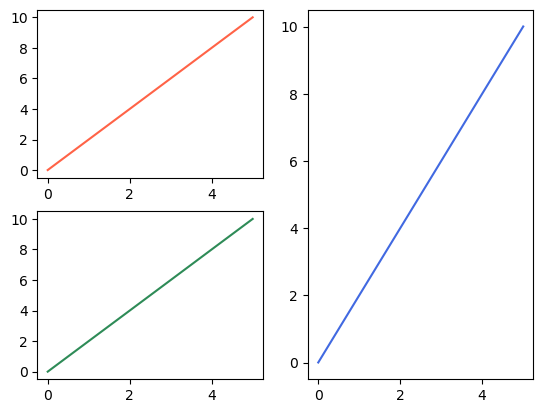

In [121]:
mosaic = [['tomato', 'royalblue'],
          ['seagreen', 'royalblue']]

fig = plt.figure()
ax = fig.subplot_mosaic(mosaic=mosaic)
print(f'{fig}: {type(fig)}')
print(f'{ax}: {type(ax)}')

ax['tomato'].plot(x, y, color='tomato');
ax['royalblue'].plot(x, y, color='royalblue');
ax['seagreen'].plot(x, y, color='seagreen');

It is not possible to do the above by slicing into the ```ndarray``` (2D) of ```Axes``` generated by ```plt.subplots``` or ```Figure.subplots``` as the slice creates another ```ndarray``` (1D) which is not a ```mpl``` class and therefore has no plot methods. 

The ```Figure.add_subplot``` method is similar to the ```plt.subplot``` function and is bound to the ```Figure``` instance. The ```Figure.add_subplot``` places each subplot individually on the ```Figure``` instead of instantiating them all simultaneously like ```Figure.subplots``` or ```Figure.subplot_mosaic``` and uses the ```index``` to select a subplot. The ```index``` is only configured for an ```int``` instance and does not recognise a ```list``` of ```int``` neighbouring values, therefore has the same limitations of ```Figure.subplots``` and isn't as flexible as ```Figure.subplot_mosaic```:

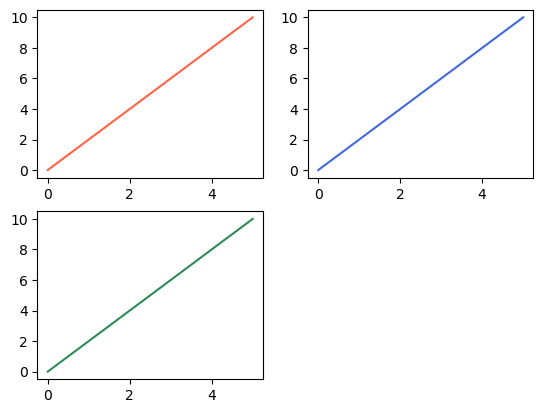

In [123]:
mosaic = [['tomato', 'royalblue'],
          ['seagreen', 'royalblue']]

fig = plt.figure()
tomato = fig.add_subplot(2, 2, 1)
royalblue = fig.add_subplot(2, 2, 2)
seagreen = fig.add_subplot(2, 2, 3)

tomato.plot(x, y, color='tomato');
royalblue.plot(x, y, color='royalblue');
seagreen.plot(x, y, color='seagreen');

Another way of adding ```Axes``` is by using the ```Figure.add_axes``` which takes in a rectangle of normalised co-ordinates of the form:

```python
rectangle = (left, bottom, width, height)
```

The parameters provided in the ```tuple``` are not named and the code can be more readable using a ```namedtuple```:

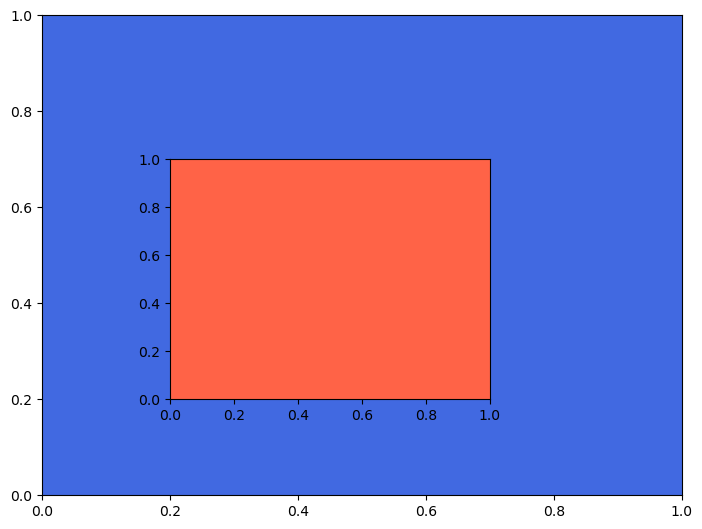

In [132]:
from collections import namedtuple
AxesRect = namedtuple('AxesRect', ['left', 'bottom', 'width', 'height'])

fig = plt.figure()
ax1 = fig.add_axes(rect=AxesRect(left=0, bottom=0, width=1, height=1), facecolor='royalblue')
ax2 = fig.add_axes(rect=AxesRect(left=0.2, bottom=0.2, width=0.5, height=0.5), facecolor='tomato')

The function ```plt.getp``` (get properties) can be used to get the properties of an instance that belongs to a ```plt``` class. If the following components of the ```Figure``` are examined:

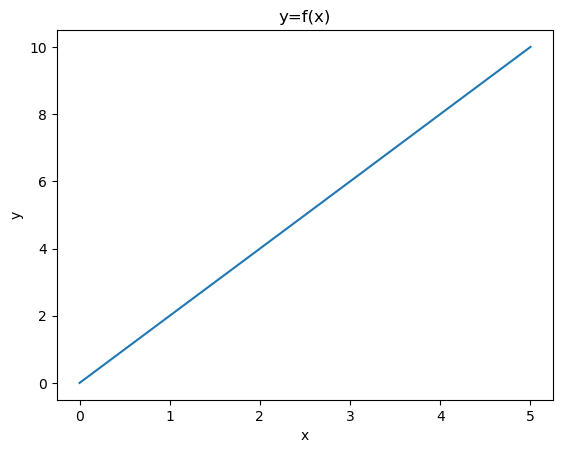

In [84]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x_text = ax.set_xlabel('x')
y_text = ax.set_ylabel('y')
title_text = ax.set_title('y=f(x)')
line_list = ax.plot(x, y)

The properties of the ```Figure``` instance can be examined:

In [85]:
plt.getp(fig)

    agg_filter = None
    alpha = None
    animated = False
    axes = [<Axes: title={'center': 'y=f(x)'}, xlabel='x', yl...
    children = [<matplotlib.patches.Rectangle object at 0x0000021...
    clip_box = None
    clip_on = True
    clip_path = None
    constrained_layout = False
    constrained_layout_pads = (None, None, None, None)
    default_bbox_extra_artists = [<Axes: title={'center': 'y=f(x)'}, xlabel='x', yl...
    dpi = 100.0
    edgecolor = (1.0, 1.0, 1.0, 1.0)
    facecolor = (1.0, 1.0, 1.0, 1.0)
    figheight = 4.8
    figure = Figure(640x480)
    figwidth = 6.4
    frameon = True
    gid = None
    in_layout = True
    label = 
    layout_engine = None
    linewidth = 0.0
    mouseover = False
    path_effects = []
    picker = None
    rasterized = False
    size_inches = [6.4 4.8]
    sketch_params = None
    snap = None
    suptitle = 
    supxlabel = 
    supylabel = 
    tight_layout = False
    tightbbox = TransformedBbox(     Bbox(x0=32.972222222222214, y...
   

The most commonly changed keyword input arguments match those shown in the docstring of the ```plt.Figure``` classes initialisation signature:

In [91]:
plt.Figure?

Init signature:
plt.Figure(
    figsize=None,
    dpi=None,
    *,
    facecolor=None,
    edgecolor=None,
    linewidth=0.0,
    frameon=None,
    subplotpars=None,
    tight_layout=None,
    constrained_layout=None,
    layout=None,
    **kwargs,
)
Docstring:     
The top level container for all the plot elements.

Attributes
----------
patch
    The `.Rectangle` instance representing the figure background patch.

suppressComposite
    For multiple images, the figure will make composite images
    depending on the renderer option_image_nocomposite function.  If
    *suppressComposite* is a boolean, this will override the renderer.
Init docstring:
Parameters
----------
figsize : 2-tuple of floats, default: :rc:`figure.figsize`
    Figure dimension ``(width, height)`` in inches.

dpi : float, default: :rc:`figure.dpi`
    Dots per inch.

facecolor : default: :rc:`figure.facecolor`
    The figure patch facecolor.

edgecolor : default: :rc:`figure.edgecolor`
    The figure patch edge col

The properties of the ```Axes``` instance can be examined:

In [92]:
plt.getp(ax)

    adjustable = box
    agg_filter = None
    alpha = None
    anchor = C
    animated = False
    aspect = auto
    autoscale_on = True
    autoscalex_on = True
    autoscaley_on = True
    axes_locator = None
    axisbelow = line
    box_aspect = None
    children = [<matplotlib.lines.Line2D object at 0x00000219F926...
    clip_box = None
    clip_on = True
    clip_path = None
    data_ratio = 2.0
    default_bbox_extra_artists = [<matplotlib.spines.Spine object at 0x00000219F925...
    facecolor or fc = (1.0, 1.0, 1.0, 1.0)
    figure = Figure(640x480)
    frame_on = True
    gid = None
    gridspec = GridSpec(1, 1)
    images = <a list of 0 AxesImage objects>
    in_layout = True
    label = 
    legend = None
    legend_handles_labels = ([], [])
    lines = <a list of 1 Line2D objects>
    mouseover = False
    navigate = True
    navigate_mode = None
    path_effects = []
    picker = None
    position = Bbox(x0=0.125, y0=0.10999999999999999, x1=0.9, y1=...
    rasterization_zo

The most commonly changed keyword input arguments match those shown in the docstring of the ```plt.Axes``` classes initialisation signature:

In [90]:
plt.Axes?

Init signature:
plt.Axes(
    fig,
    *args,
    facecolor=None,
    frameon=True,
    sharex=None,
    sharey=None,
    label='',
    xscale=None,
    yscale=None,
    box_aspect=None,
    **kwargs,
)
Docstring:     
An Axes object encapsulates all the elements of an individual (sub-)plot in
a figure.

It contains most of the (sub-)plot elements: `~.axis.Axis`,
`~.axis.Tick`, `~.lines.Line2D`, `~.text.Text`, `~.patches.Polygon`, etc.,
and sets the coordinate system.

Like all visible elements in a figure, Axes is an `.Artist` subclass.

The `Axes` instance supports callbacks through a callbacks attribute which
is a `~.cbook.CallbackRegistry` instance.  The events you can connect to
are 'xlim_changed' and 'ylim_changed' and the callback will be called with
func(*ax*) where *ax* is the `Axes` instance.

.. note::

    As a user, you do not instantiate Axes directly, but use Axes creation
    methods instead; e.g. from `.pyplot` or `.Figure`:
    `~.pyplot.subplots`, `~.pyplot.subplot_m

The properties of the ```Text``` instance can be examined:

In [97]:
plt.getp(x_text)

    agg_filter = None
    alpha = None
    animated = False
    antialiased = True
    bbox_patch = None
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    color or c = black
    figure = Figure(640x480)
    fontfamily or family or fontname = ['sans-serif']
    fontname or name = DejaVu Sans
    fontproperties or font or font_properties = sans\-serif:style=normal:variant=normal:weight=nor...
    fontsize or size = 10.0
    fontstyle or style = normal
    fontvariant or variant = normal
    fontweight or weight = normal
    gid = None
    horizontalalignment or ha = center
    in_layout = True
    label = 
    math_fontfamily = dejavusans
    mouseover = False
    parse_math = True
    path_effects = []
    picker = None
    position = (0.5, 23.52222222222222)
    rasterized = False
    rotation = 0.0
    rotation_mode = default
    sketch_params = None
    snap = None
    stretch = normal
    text = x
    tightbbox = Bbox(x0=323.875, y0=9.522222222222219,

The most commonly changed keyword input arguments match those shown in the docstring of the ```plt.Text``` classes initialisation signature:

In [96]:
plt.Text?

Init signature:
plt.Text(
    x=0,
    y=0,
    text='',
    *,
    color=None,
    verticalalignment='baseline',
    horizontalalignment='left',
    multialignment=None,
    fontproperties=None,
    rotation=None,
    linespacing=None,
    rotation_mode=None,
    usetex=None,
    wrap=False,
    transform_rotates_text=False,
    parse_math=None,
    antialiased=None,
    **kwargs,
)
Docstring:      Handle storing and drawing of text in window or data coordinates.
Init docstring:
Create a `.Text` instance at *x*, *y* with string *text*.

The text is aligned relative to the anchor point (*x*, *y*) according
to ``horizontalalignment`` (default: 'left') and ``verticalalignment``
(default: 'bottom'). See also
:doc:`/gallery/text_labels_and_annotations/text_alignment`.

While Text accepts the 'label' keyword argument, by default it is not
added to the handles of a legend.

Valid keyword arguments are:

Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a 

The properties of the ```list``` instance of ```Line2D``` classes can be examined:

In [102]:
plt.getp(line_list)

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = True
    bbox = Bbox(x0=0.0, y0=0.001, x1=5.0, y1=10.001)
    children = []
    clip_box = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=1.0, ...
    clip_on = True
    clip_path = None
    color or c = #1f77b4
    dash_capstyle = butt
    dash_joinstyle = round
    data = (array([0, 1, 2, 3, 4, 5]), array([1.0000e-03, 2.0...
    drawstyle or ds = default
    figure = Figure(640x480)
    fillstyle = full
    gapcolor = None
    gid = None
    in_layout = True
    label = _child0
    linestyle or ls = -
    linewidth or lw = 1.5
    marker = None
    markeredgecolor or mec = #1f77b4
    markeredgewidth or mew = 1.0
    markerfacecolor or mfc = #1f77b4
    markerfacecoloralt or mfcalt = none
    markersize or ms = 6.0
    markevery = None
    mouseover = False
    path = Path(array([[0.0000e+00, 1.0000e-03],        [1.00...
    path_effects = []
    picker = None
    pickradius = 5
    rasterized = False
 

Or of a single ```Line2D``` class can be examined:

In [101]:
plt.getp(line_list[0])

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = True
    bbox = Bbox(x0=0.0, y0=0.001, x1=5.0, y1=10.001)
    children = []
    clip_box = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=1.0, ...
    clip_on = True
    clip_path = None
    color or c = #1f77b4
    dash_capstyle = butt
    dash_joinstyle = round
    data = (array([0, 1, 2, 3, 4, 5]), array([1.0000e-03, 2.0...
    drawstyle or ds = default
    figure = Figure(640x480)
    fillstyle = full
    gapcolor = None
    gid = None
    in_layout = True
    label = _child0
    linestyle or ls = -
    linewidth or lw = 1.5
    marker = None
    markeredgecolor or mec = #1f77b4
    markeredgewidth or mew = 1.0
    markerfacecolor or mfc = #1f77b4
    markerfacecoloralt or mfcalt = none
    markersize or ms = 6.0
    markevery = None
    mouseover = False
    path = Path(array([[0.0000e+00, 1.0000e-03],        [1.00...
    path_effects = []
    picker = None
    pickradius = 5
    rasterized = False
 

The most commonly changed keyword input arguments match those shown in the docstring of the ```ax.plot``` classes initialisation signature:

In [100]:
ax.plot?

Signature: ax.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, 

The associated function ```plt.setp``` (set properties) can be used to set properties, for example:

[None, None, None]

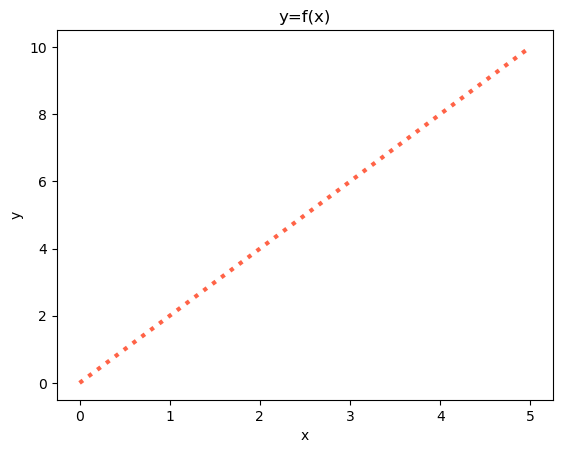

In [106]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x_text = ax.set_xlabel('x')
y_text = ax.set_ylabel('y')
title_text = ax.set_title('y=f(x)')
line_list = ax.plot(x, y)
plt.setp(line_list[0], color='tomato', linewidth=3, linestyle=':')

Instead of using ```plt.setp``` these can be supplied as input arguments for the plotting function. Normally only the ```mpl``` instances likely to be later accessed are assigned to instance names and the code above is written typically like:

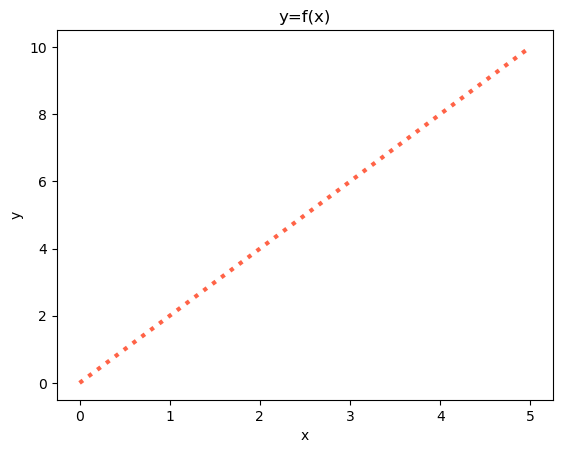

In [109]:
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('y=f(x)')
line_list = ax.plot(x, y, color='tomato', linewidth=3, linestyle=':')

## Text

The most commonly added ```Text``` to a plot are ```Axes``` labels:

### Axes Labels

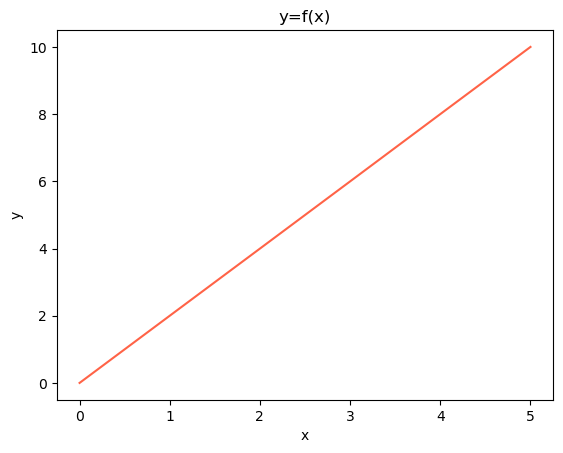

In [133]:
fig, ax = plt.subplots()
ax.plot(x, y, color='tomato')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('y=f(x)');

The docstring of the ```Axes.set_xlabel``` method may be examined to see additional properties:

In [135]:
ax.set_xlabel?

Signature: ax.set_xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
Docstring:
Set the label for the x-axis.

Parameters
----------
xlabel : str
    The label text.

labelpad : float, default: :rc:`axes.labelpad`
    Spacing in points from the Axes bounding box including ticks
    and tick labels.  If None, the previous value is left as is.

loc : {'left', 'center', 'right'}, default: :rc:`xaxis.labellocation`
    The label position. This is a high-level alternative for passing
    parameters *x* and *horizontalalignment*.

Other Parameters
----------------
**kwargs : `~matplotlib.text.Text` properties
    `.Text` properties control the appearance of the label.

See Also
--------
text : Documents the properties supported by `.Text`.
File:      c:\users\pyip\miniconda3\envs\vscode-env\lib\site-packages\matplotlib\axes\_base.py
Type:      method

These are Text related so also have the following keyword input arguments:

In [136]:
plt.Text?

Init signature:
plt.Text(
    x=0,
    y=0,
    text='',
    *,
    color=None,
    verticalalignment='baseline',
    horizontalalignment='left',
    multialignment=None,
    fontproperties=None,
    rotation=None,
    linespacing=None,
    rotation_mode=None,
    usetex=None,
    wrap=False,
    transform_rotates_text=False,
    parse_math=None,
    antialiased=None,
    **kwargs,
)
Docstring:      Handle storing and drawing of text in window or data coordinates.
Init docstring:
Create a `.Text` instance at *x*, *y* with string *text*.

The text is aligned relative to the anchor point (*x*, *y*) according
to ``horizontalalignment`` (default: 'left') and ``verticalalignment``
(default: 'bottom'). See also
:doc:`/gallery/text_labels_and_annotations/text_alignment`.

While Text accepts the 'label' keyword argument, by default it is not
added to the handles of a legend.

Valid keyword arguments are:

Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a 

For example the following changes can be made to the xlabel;

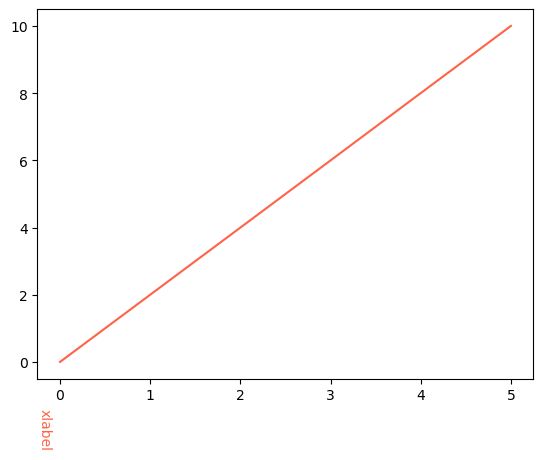

In [137]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='tomato');
ax.set_xlabel('xlabel', loc='left', color='tomato', rotation=270);

### Labels and LaTeX (MathJax)

The labels also support some basic LaTeX in the form of MathJax. Commonly used symbols include:

LaTeX Text (MathJax)

|description|LaTeX|output|
|---|---|---|
|math text|```$x$```|$x$|
|normal text|```$\text{x}$```|$\text{x}$|
|bold text|```$\textbf{x}$```|$\textbf{x}$|
|math text with dot|```$\dot{x}$```|$\dot{x}$|
|math text with double dot|```$\ddot{x}$```|$\ddot{x}$|
|math text with triple dot|```$\dddot{x}$```|$\dddot{x}$|
|math text with bar|```$\bar{x}$```|$\bar{x}$|
|math text with hat|```$\hat{x}$```|$\hat{x}$|
|math text with arrow vector|```$\vec{x}$```|$\vec{x}$|
|math text with tilde|```$\tilde{x}$```|$\tilde{x}$|
|math text with wide tilde|```$\widetilde{xx}$```|$\widetilde{xx}$|
|math text with check|```$\check{x}$```|$\check{x}$|
|math text with acute|```$\acute{x}$```|$\acute{x}$|
|math text with grave|```$\grave{x}$```|$\grave{x}$|
|math text with breve|```$\breve{x}$```|$\breve{x}$|
|subscript|```$x_{2}$```|$x_{2}$|
|superscript|```$x^{3}$```|$x^{3}$|
|subscript and superscript|```$x_{2}^{3}$```|$x_{2}^{3}$|
|square root|```$\sqrt{x}$```|$\sqrt{x}$|
|sin|```$\sin{x}$```|$\sin{x}$|
|cos|```$\cos{x}$```|$\cos{x}$|
|tan|```$\tan{x}$```|$\tan{x}$|
|log|```$\log{x}$```|$\log{x}$|
|exp|```$\exp{x}$```|$\exp{x}$|

LaTeX Mathematical Symbols (MathJax)

|description|LaTeX|output|
|---|---|---|
|equal to|```$=$```|$=$|
|equivalent to|```$\equiv$```|$\equiv$|
|not equal to|```$\ne$```|$\ne$|
|similar to|```$\sim$```|$\sim$|
|approximate to|```$\approx$```|$\approx$|
|tilde|```$\textasciitilde$```|$\textasciitilde$|
|approximately equal to|```$\cong$```|$\cong$|
|plus|```$+$```|$+$|
|minus|```$-$```|$-$|
|plus minus|```$\pm$```|$\pm$|
|minus plus|```$\mp$```|$\mp$|
|dash|```$\text{-}$```|$\text{-}$|
|circumflex|```$\textasciicircum$```|$\textasciicircum$|
|asterisk|```$\ast$```|$\ast$|
|star|```$\text{\*}$```|$\text{\*}$|
|times|```$\times$```|$\times$|
|centre dot|```$\cdot$```|$\cdot$|
|period|```$.$```|$.$|
|bullet|```$\bullet$```|$\bullet$|
|colon|```$\colon$```|$\colon$|
|centre dots|```$\cdots$```|$\cdots$|
|vertical dots|```$\vdots$```|$\vdots$|
|therefore|```$\therefore$```|$\therefore$|
|division slash|```$/$```|$/$|
|division sign|```$\div$```|$\div$|
|less than|```$<$```|$<$|
|less than or equal to|```$\leq$```|$\leq$|
|greater than|```$>$```|$>$|
|greater than or equal to|```$\geq$```|$\geq$|
|factorial|```$!$```|$!$|
|degree|```$\degree$```|$\degree$|
|infinity|```$\infty$```|$\infty$|
|proportional to|```$\propto$```|$\propto$|
|partial|```$\partial$```|$\partial$|
|hbar|```$\hbar$```|$\hbar$|
|union|```$\cup$```|$\cup$|
|intersection|```$\cap$```|$\cap$|
|emptyset|```$\emptyset$```|$\emptyset$|
|exists|```$\exists$```|$\exists$|
|in|```$\in$```|$\in$|
|not in|```$\notin$```|$\notin$|
|ni|```$\ni$```|$\ni$|
|left arrow|```$\leftarrow$```|$\leftarrow$|
|right arrow|```$\rightarrow$```|$\rightarrow$|
|left right arrow|```$\leftrightarrow$```|$\leftrightarrow$|
|up arrow|```$\uparrow$```|$\uparrow$|
|down arrow|```$\uparrow$```|$\downarrow$|
|up down arrow|```$\updownarrow$```|$\updownarrow$|

LaTeX Greek Letters (MathJax)

|description|LaTeX|output|
|---|---|---|
|alpha|```$\alpha$```|$\alpha$|
|beta|```$\beta$```|$\beta$|
|Gamma|```$\Gamma$```|$\Gamma$|
|gamma|```$\gamma$```|$\gamma$|
|Delta|```$\Delta$```|$\Delta$|
|delta|```$\delta$```|$\delta$|
|nabla|```$\nabla$```|$\nabla$|
|epsilon|```$\epsilon$```|$\epsilon$|
|epsilon|```$\varepsilon$```|$\varepsilon$|
|zeta|```$\zeta$```|$\zeta$|
|eta|```$\eta$```|$\eta$|
|kappa|```$\kappa$```|$\kappa$|
|Lambda|```$\Lamba$```|$\Lambda$|
|mu|```$\mu$```|$\mu$|
|Xi|```$\Xi$```|$\Xi$|
|xi|```$\xi$```|$\xi$|
|Pi|```$\Pi$```|$\Pi$|
|pi|```$\pi$```|$\pi$|
|rho|```$\rho$```|$\rho$|
|Sigma|```$\Sigma$```|$\Sigma$|
|sigma|```$\sigma$```|$\sigma$|
|sigma|```$\varsigma$```|$\varsigma$|
|tau|```$\tau$```|$\tau$|
|Upsilon|```$\Upsilon$```|$\Upsilon$|
|upsilon|```$\upsilon$```|$\upsilon$|
|Phi|```$\Phi$```|$\Phi$|
|phi|```$\phi$```|$\phi$|
|chi|```$\chi$```|$\chi$|
|Psi|```$\Psi$```|$\Psi$|
|psi|```$\psi$```|$\psi$|
|Omega|```$\Omega$```|$\Omega$|
|omega|```$\omega$```|$\omega$|

Note the Greek letters A, B, E, Z, H, I, i, K, M, N, O, o and P that are the same as Latin letters are therefore just represented using the Latin letters.

LaTeX Fractions (MathJax)

|description|LaTeX|output|
|---|---|---|
|inline fraction|```$\frac{a}{b}$```|$\frac{a}{b}$|

LaTeX Brackets (MathJax)

|description|LaTeX|output|
|---|---|---|
|inline fraction parenthesis|```$(\frac{a}{b})$```|$(\frac{a}{b})$|
|inline fraction square|```$[\frac{a}{b}]$```|$[\frac{a}{b}]$|
|inline fraction braces|```$\lbrace\frac{a}{b}\rbrace$```|$\lbrace\frac{a}{b} \rbrace$|

The ```{``` and ```}``` are reserved so ```\lbrace``` and ```\rbrace``` need to be used.

Input any code containing LaTeX as a raw ```str```. The LaTeX will be processed but use the default font in ```mpl```. Supplying the additional keyword input argument ```usetex=True``` will attempt to process the plot with LaTeX but there are often issues with LaTeX setup:

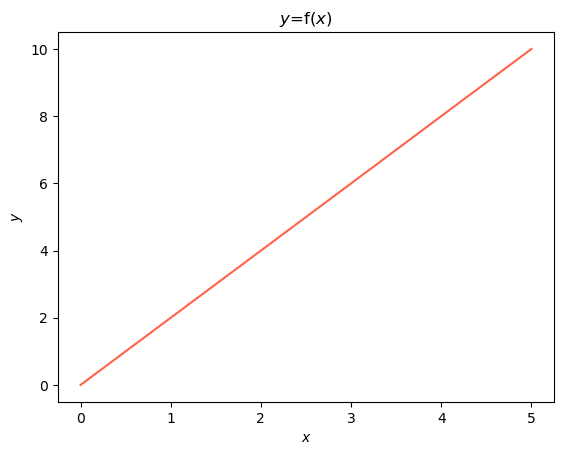

In [143]:
fig, ax = plt.subplots()
ax.plot(x, y, color='tomato')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title(r'$y$=f($x$)');

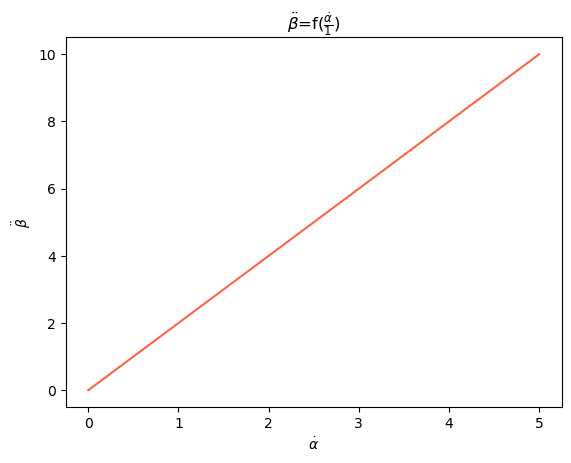

In [139]:
fig, ax = plt.subplots(num=1)
ax.plot(x, y, color='tomato')
ax.set_xlabel(r'$\dot{\alpha}$')
ax.set_ylabel(r'$\ddot{\beta}$')
ax.set_title(r'$\ddot{\beta}$=f$(\frac{\dot{\alpha}}{1})$');

### Annotations

Annotations can be added using the method ```Axes.annotate``` or function ```plt.annotate```:

In [144]:
ax.annotate?

Signature:
ax.annotate(
    text,
    xy,
    xytext=None,
    xycoords='data',
    textcoords=None,
    arrowprops=None,
    annotation_clip=None,
    **kwargs,
)
Docstring:
Annotate the point *xy* with text *text*.

In the simplest form, the text is placed at *xy*.

Optionally, the text can be displayed in another position *xytext*.
An arrow pointing from the text to the annotated point *xy* can then
be added by defining *arrowprops*.

Parameters
----------
text : str
    The text of the annotation.

xy : (float, float)
    The point *(x, y)* to annotate. The coordinate system is determined
    by *xycoords*.

xytext : (float, float), default: *xy*
    The position *(x, y)* to place the text at. The coordinate system
    is determined by *textcoords*.

xycoords : single or two-tuple of str or `.Artist` or `.Transform` or callable, default: 'data'

    The coordinate system that *xy* is given in. The following types
    of values are supported:

    - One of the following strings:

  

The annotation takes in a number of keyword input arguments. 

In the simplest case, ```text``` is the text to be annotated and ```xy``` is a tuple of the co-ordinates using the units specified in ```xycoords```.

More generally a specific data point at ```xy``` is annotated using text at ```xytext``` and an arrow is drawn from ```xytext``` to ```xy```. 

The keyword argument ```arrowprops``` is a ```dict``` of arrow properties. The default Python syntax ```{}``` can be used for the ```dict``` instance however often instantiation of the ```dict``` class using named parameters is preferred. Instantiation of a ```dict``` using the ```dict``` class matches the format of input arguments used elsewhere in the function call:

Text(4, 6, 'customarrow')

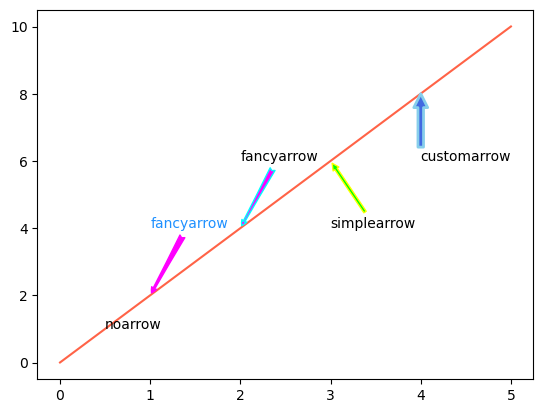

In [146]:
fig, ax = plt.subplots()
ax.plot(x, y, color='tomato')

ax.annotate(text='noarrow', xy=(0.5, 1), xycoords='data')

ax.annotate(text='fancyarrow', xy=(1, 2), xytext=(1, 4), xycoords='data', color='dodgerblue', 
            arrowprops={'color': 'magenta', 'arrowstyle': 'fancy'})
ax.annotate(text='fancyarrow', xy=(2, 4), xytext=(2, 6), xycoords='data', 
            arrowprops={'facecolor': 'magenta', 'edgecolor': 'cyan', 'arrowstyle': 'fancy'})
ax.annotate(text='simplearrow', xy=(3, 6), xytext=(3, 4), xycoords='data', 
            arrowprops={'facecolor': 'lime', 'edgecolor': 'yellow', 'arrowstyle': 'simple'})

ax.annotate(text='customarrow', xy=(4, 8), xytext=(4, 6), xycoords='data', 
            arrowprops=dict(facecolor='royalblue', edgecolor='skyblue', headlength=10, headwidth=10, linewidth=2))

## Axes Limits

The Axes limits are automatically determined from the data:

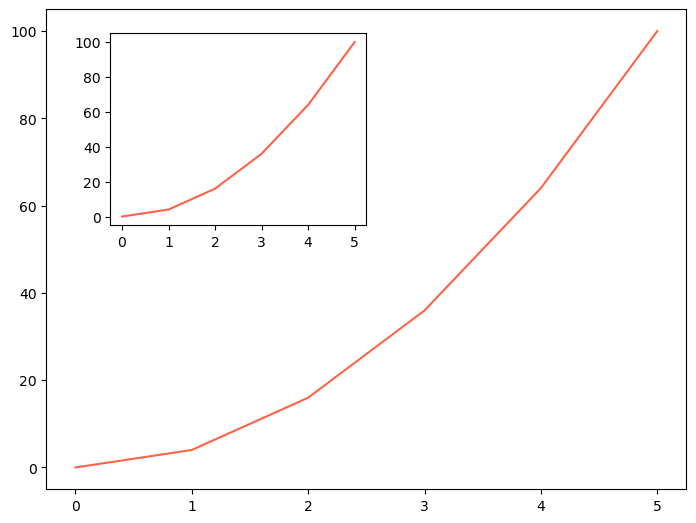

In [151]:
fig = plt.figure()
ax1 = fig.add_axes(rect=AxesRect(left=0, bottom=0, width=1, height=1))
ax1.plot(x, y**2, color='tomato')
ax2 = fig.add_axes(rect=AxesRect(left=0.1, bottom=0.55, width=0.4, height=0.4))
ax2.plot(x, y**2, color='tomato')

Sometimes it is desirable to change the ```Axes``` limits to zoom in or out of a region. This is done by the methods ```Axes.set_xlim``` and ```Axes.set_ylim``` or equivalent function ```plt.xlim``` or ```plt.ylim```:

In [152]:
ax1.set_xlim?

Signature:
ax1.set_xlim(
    left=None,
    right=None,
    *,
    emit=True,
    auto=False,
    xmin=None,
    xmax=None,
)
Docstring:
Set the x-axis view limits.

Parameters
----------
left : float, optional
    The left xlim in data coordinates. Passing *None* leaves the
    limit unchanged.

    The left and right xlims may also be passed as the tuple
    (*left*, *right*) as the first positional argument (or as
    the *left* keyword argument).

    .. ACCEPTS: (left: float, right: float)

right : float, optional
    The right xlim in data coordinates. Passing *None* leaves the
    limit unchanged.

emit : bool, default: True
    Whether to notify observers of limit change.

auto : bool or None, default: False
    Whether to turn on autoscaling of the x-axis. True turns on,
    False turns off, None leaves unchanged.

xmin, xmax : float, optional
    They are equivalent to left and right respectively, and it is an
    error to pass both *xmin* and *left* or *xmax* and *right*.

R

Supposing the smaller ```Axes``` is supposed to highlight the start of the data, the following limits can be added:

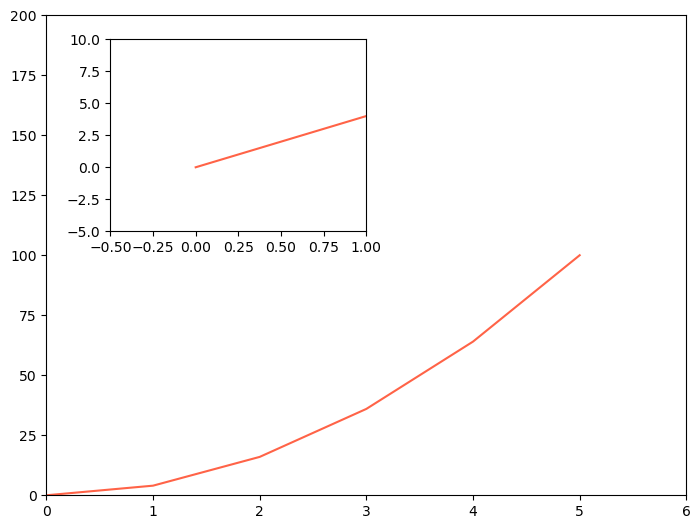

In [153]:
fig = plt.figure()
ax1 = fig.add_axes(rect=AxesRect(left=0, bottom=0, width=1, height=1))
ax1.set_xlim(left=0, right=6, auto=False)
ax1.set_ylim(bottom=0, top=200, auto=False)
ax1.plot(x, y**2, color='tomato')
ax2 = fig.add_axes(rect=AxesRect(left=0.1, bottom=0.55, width=0.4, height=0.4))
ax2.set_xlim(left=-0.5, right=1, auto=False)
ax2.set_ylim(bottom=-5, top=10, auto=False)
ax2.plot(x, y**2, color='tomato')

The limits are normally set by using the keyword arguments ```left``` and ```right``` for x or ```bottom``` and ```top``` for y. 

```python
ax1.set_xlim(left=0, right=6, auto=False)
ax1.set_ylim(bottom=0, top=200, auto=False)
```

```left``` and ```right``` have the alias ```xmin``` and ```xmax```. Likewise ```bottom``` and ```top``` have the alias ```ymin``` and ```ymax```:

```python
ax1.set_xlim(xmin=0, xmax=6, auto=False)
ax1.set_ylim(ymin=0, ymax=200, auto=False)
```

If both limits are provided, they can also be supplied using a ```tuple```:

```python
ax1.set_xlim((0, 6), auto=False)
ax1.set_ylim((0, 200), auto=False)
```


## Axes Scale

When a value has a non-linear dependence it is sometimes insightful to view it on a logarithmic scale. This can be done using the axes methods set_xscale and set_yscale respectively which also have the pyplot functions xscale and yscale:

In [ ]:
? ax2.set_yscale

The log of 0 is -∞:

In [ ]:
# np.log(0)

And the log of a negative number is not a number:

In [ ]:
# np.log(-1)

Therefore the bottom limit is normally set to 1 when using a log scale:

In [ ]:
fig = plt.Figure()
ax1 = fig.add_axes(rect=(0, 0, 1, 1))
ax1.plot(x, y**10, color='tomato')
ax2 = fig.add_axes(rect=(0.1, 0.55, 0.4, 0.4))
ax2.plot(x, y**10, color='tomato')

ax2.set_yscale('log')
ax2.set_ylim(bottom=1)
fig

## Line Plot

Previously a single line plot was created using the plot function and returned to the instance name chart:

In [ ]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y);

chart was seen to be a list of Line2D objects and in this case a single element list:

In [ ]:
chart

The method plot can take it multiple positional input arguments:

In [ ]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, 
                x, y+1,
                x, y+2,
                x, y+3, 
                x, y+4,
                x, y+5,
                x, y+6,
                x, y+7,
                x, y+8,
                x, y+9,
                x, y+10,
                x, y+11);

## Colors

Notice that each line has its own color until the 10th line is reached and the colors then repeat. This is because the default colors used are called TABLEAU_COLORS and there are 10 colors:

In [ ]:
from matplotlib.colors import TABLEAU_COLORS

In [ ]:
TABLEAU_COLORS

Notice that TABLEAU_colors is a dictionary. The keys are strings and the values are hexadecimal strings.

Hexadecimal strings have the form:

```
#rrggbb
```

The human eye has short wavelength (blue sensitive), medium wavelength (green sensitive) and long wavelength (red sensitive) receptors and the brain maps a color ratio from these receptors to what a human perceives as a color.

Each pixel in screen uses a red, green and blue LED known as a rgb LED to perform color mixing. Each channel spans over 1 byte which recall can be represented using 2 hexadecimal characters.

matplotlib has another color dictionary called CSS4_COLORS, the key for each color is a string that corresponds to the English name of the color and the value is the corresponding hexadecimal value:

In [ ]:
from matplotlib.colors import CSS4_COLORS

In [ ]:
CSS4_COLORS

The key can be used to access the color:

In [ ]:
CSS4_COLORS['royalblue']

In [ ]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, color=CSS4_COLORS['royalblue']);

However the keys from CSS4_COLORS are recognised by color related input arguments of matplotlib functions and normally used directly:

In [ ]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, color='royalblue');

Notice that if color is provided as a keyword input argument, in a multiline plot that all lines will have the same color:

In [ ]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, 
                x, y+1,
                x, y+2,
                x, y+3, 
                x, y+4,
                x, y+5,
                x, y+6,
                x, y+7,
                x, y+8,
                x, y+9,
                x, y+10,
                x, y+11,
                color='royalblue');

Instead these can be provided positionally for each line:

In [ ]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, 'royalblue', 
                x, y+1, 'tomato',
                x, y+2, 'chocolate',
                x, y+3, 'forestgreen',
                x, y+4, 'springgreen',
                x, y+5, 'turquoise',
                x, y+6, 'teal',
                x, y+7, 'skyblue',
                x, y+8, 'dodgerblue',
                x, y+9, 'slateblue',
                x, y+10, 'fuchsia',
                x, y+11, 'hotpink');

## LineWidth

The linewidth can be changed using the keyword argument linewidth:

In [ ]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, linewidth=5)

This has the alias lw:

In [ ]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, lw=2.5)

When linewidth is provided as a keyword input argument, in a multiline plot that all lines will have the same width:

In [ ]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, 
                x, y+1,
                x, y+2,
                x, y+3, 
                x, y+4,
                x, y+5,
                x, y+6,
                x, y+7,
                x, y+8,
                x, y+9,
                x, y+10,
                x, y+11,
                color='royalblue', linewidth=0.5);

When a high level of customisation is desired, each line is normally seperately plotted. Recall the return value for ax.plot is a list of lines, in this case a single line. An empty list chart can be made and each plot appended:

In [ ]:
fig, ax = plt.subplots(num=1);
chart = []
chart.append(ax.plot(x, y, color='royalblue', linewidth=0.5)[0])
chart.append(ax.plot(x, y+1, color='tomato', linewidth=0.6)[0])
chart.append(ax.plot(x, y+2, color='chocolate', linewidth=0.7)[0])
chart.append(ax.plot(x, y+3, color='forestgreen', linewidth=0.8)[0])
chart.append(ax.plot(x, y+4, color='springgreen', linewidth=0.9)[0])
chart.append(ax.plot(x, y+5, color='turquoise', linewidth=1.0)[0])
chart.append(ax.plot(x, y+6, color='teal', linewidth=1.1)[0])
chart.append(ax.plot(x, y+7, color='skyblue', linewidth=1.2)[0])
chart.append(ax.plot(x, y+8, color='dodgerblue', linewidth=1.3)[0])
chart.append(ax.plot(x, y+9, color='slateblue', linewidth=1.4)[0])
chart.append(ax.plot(x, y+10, color='fuchsia', linewidth=1.5)[0])
chart.append(ax.plot(x, y+11, color='hotpink', linewidth=1.6)[0])

The list chart contaisn the 12 lines:

In [ ]:
chart

The ax attribute lines also gives these:

In [ ]:
ax.lines

This is seen more clearly if it is cast to a list:

In [ ]:
list(ax.lines)

This means the more simpler syntax can be used:

In [ ]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', linewidth=0.5)
ax.plot(x, y+1, color='tomato', linewidth=0.6)
ax.plot(x, y+2, color='chocolate', linewidth=0.7)
ax.plot(x, y+3, color='forestgreen', linewidth=0.8)
ax.plot(x, y+4, color='springgreen', linewidth=0.9)
ax.plot(x, y+5, color='turquoise', linewidth=1.0)
ax.plot(x, y+6, color='teal', linewidth=1.1)
ax.plot(x, y+7, color='skyblue', linewidth=1.2)
ax.plot(x, y+8, color='dodgerblue', linewidth=1.3)
ax.plot(x, y+9, color='slateblue', linewidth=1.4)
ax.plot(x, y+10, color='fuchsia', linewidth=1.5)
ax.plot(x, y+11, color='hotpink', linewidth=1.6)

## Line Style

The linestyle can be changed using the keyword input argument linestyle:

In [ ]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', linestyle='dashed', linewidth=2.0)

This has the abbreviation ls:

In [ ]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', ls='dotted', lw=3.0)

The most common linestyles have a linestyle string and abbreviated linestyle string. Other line styles can be specified usign a tuple:

|description|linestyle string|line style string abbreviation|line style tuple|
|---|---|---|---|
|solid|'solid'|'-'||
|dashed|'dashed'|'--'|(0, (5, 5)))|
|dotted|'dotted'|':'|(0, (1, 1)))|
|dashdot|'dashdot|'-.'||
|loosely dotted|||(0, (1, 10)))|
|densely dotted|||(0, (1, 1)))|
|long dash with offset|||(5, (10, 3)))|
|loosely dashed|||(0, (5, 10)))|
|densely dashed|||(0, (5, 1)))|
|loosely dashdotted|||(0, (3, 10, 1, 10)))|
|dashdotted|||(0, (3, 5, 1, 5)))|
|densely dashdotted|||(0, (3, 1, 1, 1)))|
|dashdotdotted|||(0, (3, 5, 1, 5, 1, 5)))|
|loosely dashdotdotted|||(0, (3, 10, 1, 10, 1, 10)))|
|densely dashdotdotted|||(0, (3, 1, 1, 1, 1, 1)))|


In [ ]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', linewidth=1.0, linestyle='solid')
ax.plot(x, y+1, color='tomato', linewidth=1.0, linestyle='dashed')
ax.plot(x, y+2, color='chocolate', linewidth=1.0, linestyle='dotted')
ax.plot(x, y+3, color='forestgreen', linewidth=1.0, linestyle='dashdot')
ax.plot(x, y+4, color='springgreen', linewidth=1.0, linestyle=(0, (1, 10)))
ax.plot(x, y+5, color='turquoise', linewidth=1.0, linestyle=(0, (1, 1)))
ax.plot(x, y+6, color='teal', linewidth=1.0, linestyle=(5, (10, 3)))
ax.plot(x, y+7, color='skyblue', linewidth=1.0, linestyle=(0, (5, 10)))
ax.plot(x, y+8, color='dodgerblue', linewidth=1.0, linestyle=(0, (5, 1)))
ax.plot(x, y+9, color='slateblue', linewidth=1.0, linestyle=(0, (3, 10, 1, 10)))
ax.plot(x, y+10, color='fuchsia', linewidth=1.0, linestyle=(0, (3, 5, 1, 5)))
ax.plot(x, y+11, color='hotpink', linewidth=1.0, linestyle=(0, (3, 1, 1, 1)))

## Markers

In a line plot, markers are not added by default, they can be added using the keyword marker:

In [ ]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, color='royalblue', marker='o')

The following are commonly used markers:

|Marker Description|String|Integer or None|
|---|---|---|
|nothing|```''```|```None```|
|point|```'.'```||
|pixel|```','```||
|circle|```'o'```||
|triangle_down|```'v'```||
|triangle_up|```'^'```||
|triangle_left|```'<'```||
|triangle_right|```'>'```||
|tri_down|```'1'```||
|tri_up|```'2'```||
|tri_left|```'3'```||
|tri_right|```'4'```||
|octagon|```'8'```||
|square|```'s'```||
|pentagon|```'p'```||
|plus_filled|```'P'```||
|star|```'*'```||
|hexagon1|```'h'```||
|hexagon2|```'H'```||
|plus|```'+'```||
|x|```'x'```||
|X|```'X'```||
|vline|```'\|'```||
|hline|```'_'```||
|tickleft||```0```|
|tickright||```1```|
|caretleft||```2```|
|caretright||```3```|
|caretup||```4```|
|caretdown||```5```|
|caretleftbase||```6```|
|caretrightbase||```7```|
|caretupbase||```8```|
|caretdownbase||```9```|

Once again specification of a keyword input argument, in a multiline plot will apply that option to all lines:

In [ ]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, 
                x, y+1,
                x, y+2,
                x, y+3, 
                x, y+4,
                x, y+5,
                x, y+6,
                x, y+7,
                x, y+8,
                x, y+9,
                x, y+10,
                x, y+11,
                marker='o');

The marker can be specified individually as a positional input argument:

In [ ]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, 'o', 
                x, y+1, 'v',
                x, y+2, '^',
                x, y+3, '<',
                x, y+4, '>',
                x, y+5, '8',
                x, y+6, 's',
                x, y+7, 'p',
                x, y+8, 'h',
                x, y+9, '*',
                x, y+10, '+',
                x, y+11, '|');

There are a number of marker related settings such as markersize, markeredgewidth, markeredgecolor, markerfacecolor and markerfacecoloralt which is only relevent if a fillstyle is selected:

In [ ]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='orange', linestyle=':',
        marker='o', markersize=15,
        markeredgewidth=2, markeredgecolor='cyan',
        markerfacecolor='yellow',
        fillstyle='top', markerfacecoloralt='plum')

These have the following abbreviated alias:

In [ ]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='orange', ls='dotted',
        marker='o', ms=15,
        mew=2, mec='cyan',
        mfc='yellow',
        fillstyle='left', mfcalt='plum')

## Draw Style

The input argument drawstyle determines the connection between datapoints, the default style draws a line between them, however it is also possible to connect them using a step. The step can be pre, mid or post:

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, num=1);
ax[0, 0].plot(x, y, color='orange', linestyle='dotted',
              drawstyle='default',
              marker='o', ms=15,
              mfc='cyan')
ax[0, 1].plot(x, y, color='orange', linestyle='dotted',
              drawstyle='steps-pre',
              marker='o', ms=15,
              mfc='cyan')
ax[1, 0].plot(x, y, color='orange', linestyle='dotted',
              drawstyle='steps-mid',
              marker='o', ms=15,
              mfc='cyan')
ax[1, 1].plot(x, y, color='orange', linestyle='dotted',
              drawstyle='steps-post',
              marker='o', ms=15,
              mfc='cyan')

## Label and Legend

A label can be added for each line and a legend produced:

In [ ]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', label='royalblue')
ax.plot(x, y+1, color='tomato', label='tomato')
ax.plot(x, y+2, color='chocolate', label='chocolate')
ax.plot(x, y+3, color='forestgreen', label='forestgreen')
ax.plot(x, y+4, color='springgreen', label='springgreen')
ax.plot(x, y+5, color='turquoise', label='turquise')
ax.plot(x, y+6, color='teal', label='teal')
ax.plot(x, y+7, color='skyblue', label='skyblue')
ax.plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax.plot(x, y+9, color='slateblue', label='slateblue')
ax.plot(x, y+10, color='fuchsia', label='fuchsia')
ax.plot(x, y+11, color='hotpink', label='hotpink')
ax.legend()

In [ ]:
? ax.legend

In [ ]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', label='royalblue')
ax.plot(x, y+1, color='tomato', label='tomato')
ax.plot(x, y+2, color='chocolate', label='chocolate')
ax.plot(x, y+3, color='forestgreen', label='forestgreen')
ax.plot(x, y+4, color='springgreen', label='springgreen')
ax.plot(x, y+5, color='turquoise', label='turquise')
ax.plot(x, y+6, color='teal', label='teal')
ax.plot(x, y+7, color='skyblue', label='skyblue')
ax.plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax.plot(x, y+9, color='slateblue', label='slateblue')
ax.plot(x, y+10, color='fuchsia', label='fuchsia')
ax.plot(x, y+11, color='hotpink', label='hotpink')
ax.legend(loc='center right')

The black box enclosing the axis is known as the bbox. The bbox_to_anchor input argument will anchor the legend to the bbox using a tuple of the form (x, y), x is the normalised ratio of the bbox x and y is the normalised ratio of the bbox y. A bbox_to_anchor=(0.3, 0.8) for example moves the bottom left corner of the legend to the normalised position specified:

In [ ]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', label='royalblue')
ax.plot(x, y+1, color='tomato', label='tomato')
ax.plot(x, y+2, color='chocolate', label='chocolate')
ax.plot(x, y+3, color='forestgreen', label='forestgreen')
ax.plot(x, y+4, color='springgreen', label='springgreen')
ax.plot(x, y+5, color='turquoise', label='turquise')
ax.plot(x, y+6, color='teal', label='teal')
ax.plot(x, y+7, color='skyblue', label='skyblue')
ax.plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax.plot(x, y+9, color='slateblue', label='slateblue')
ax.plot(x, y+10, color='fuchsia', label='fuchsia')
ax.plot(x, y+11, color='hotpink', label='hotpink')
ax.legend(bbox_to_anchor=(0.3, 0.8))

A bbox_to_anchor=(1.0, 0) for example moves the top right corner of the legend to the normalised position specified:

In [ ]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', label='royalblue')
ax.plot(x, y+1, color='tomato', label='tomato')
ax.plot(x, y+2, color='chocolate', label='chocolate')
ax.plot(x, y+3, color='forestgreen', label='forestgreen')
ax.plot(x, y+4, color='springgreen', label='springgreen')
ax.plot(x, y+5, color='turquoise', label='turquise')
ax.plot(x, y+6, color='teal', label='teal')
ax.plot(x, y+7, color='skyblue', label='skyblue')
ax.plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax.plot(x, y+9, color='slateblue', label='slateblue')
ax.plot(x, y+10, color='fuchsia', label='fuchsia')
ax.plot(x, y+11, color='hotpink', label='hotpink')
ax.legend(bbox_to_anchor=(1.0, 0))

A bbox_to_anchor=(1.0, 0.5) for example moves the top left corner of the legend to the normalised position specified:

In [ ]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', label='royalblue')
ax.plot(x, y+1, color='tomato', label='tomato')
ax.plot(x, y+2, color='chocolate', label='chocolate')
ax.plot(x, y+3, color='forestgreen', label='forestgreen')
ax.plot(x, y+4, color='springgreen', label='springgreen')
ax.plot(x, y+5, color='turquoise', label='turquise')
ax.plot(x, y+6, color='teal', label='teal')
ax.plot(x, y+7, color='skyblue', label='skyblue')
ax.plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax.plot(x, y+9, color='slateblue', label='slateblue')
ax.plot(x, y+10, color='fuchsia', label='fuchsia')
ax.plot(x, y+11, color='hotpink', label='hotpink')
ax.legend(bbox_to_anchor=(1.0, 0.5))

A bbox_to_anchor=(1.0, 0.9) for example moves the top left corner of the legend to the normalised position specified:

In [ ]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', label='royalblue')
ax.plot(x, y+1, color='tomato', label='tomato')
ax.plot(x, y+2, color='chocolate', label='chocolate')
ax.plot(x, y+3, color='forestgreen', label='forestgreen')
ax.plot(x, y+4, color='springgreen', label='springgreen')
ax.plot(x, y+5, color='turquoise', label='turquise')
ax.plot(x, y+6, color='teal', label='teal')
ax.plot(x, y+7, color='skyblue', label='skyblue')
ax.plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax.plot(x, y+9, color='slateblue', label='slateblue')
ax.plot(x, y+10, color='fuchsia', label='fuchsia')
ax.plot(x, y+11, color='hotpink', label='hotpink')
ax.legend(bbox_to_anchor=(1.0, 0.90))

If subplots are created, the ax legend method can be used on each axis:

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, num=1);
ax[0].plot(x, y, color='royalblue', label='royalblue')
ax[0].plot(x, y+1, color='tomato', label='tomato')
ax[0].plot(x, y+2, color='chocolate', label='chocolate')
ax[0].plot(x, y+3, color='forestgreen', label='forestgreen')
ax[0].plot(x, y+4, color='springgreen', label='springgreen')
ax[0].plot(x, y+5, color='turquoise', label='turquise')
ax[1].plot(x, y+6, color='teal', label='teal')
ax[1].plot(x, y+7, color='skyblue', label='skyblue')
ax[1].plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax[1].plot(x, y+9, color='slateblue', label='slateblue')
ax[1].plot(x, y+10, color='fuchsia', label='fuchsia')
ax[1].plot(x, y+11, color='hotpink', label='hotpink')
ax[0].legend(bbox_to_anchor=(1.0, 0.90))
ax[1].legend(bbox_to_anchor=(1.0, 0.90))

The figure ax method can also be used which combines the legends together. The bbox for the figure can be conceptualisaed as an invisible bbox around all the subplots on the figure, for example a bbox_to_anchor=(0.5, 0.5) moves the top right of the legend to the following position:

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, num=1);
ax[0].plot(x, y, color='royalblue', label='royalblue')
ax[0].plot(x, y+1, color='tomato', label='tomato')
ax[0].plot(x, y+2, color='chocolate', label='chocolate')
ax[0].plot(x, y+3, color='forestgreen', label='forestgreen')
ax[0].plot(x, y+4, color='springgreen', label='springgreen')
ax[0].plot(x, y+5, color='turquoise', label='turquise')
ax[1].plot(x, y+6, color='teal', label='teal')
ax[1].plot(x, y+7, color='skyblue', label='skyblue')
ax[1].plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax[1].plot(x, y+9, color='slateblue', label='slateblue')
ax[1].plot(x, y+10, color='fuchsia', label='fuchsia')
ax[1].plot(x, y+11, color='hotpink', label='hotpink')
fig.legend(bbox_to_anchor=(0.5, 0.5))

An x value greater than 1 is often used to move this outside the bbox:

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, num=1);
ax[0].plot(x, y, color='royalblue', label='royalblue')
ax[0].plot(x, y+1, color='tomato', label='tomato')
ax[0].plot(x, y+2, color='chocolate', label='chocolate')
ax[0].plot(x, y+3, color='forestgreen', label='forestgreen')
ax[0].plot(x, y+4, color='springgreen', label='springgreen')
ax[0].plot(x, y+5, color='turquoise', label='turquise')
ax[1].plot(x, y+6, color='teal', label='teal')
ax[1].plot(x, y+7, color='skyblue', label='skyblue')
ax[1].plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax[1].plot(x, y+9, color='slateblue', label='slateblue')
ax[1].plot(x, y+10, color='fuchsia', label='fuchsia')
ax[1].plot(x, y+11, color='hotpink', label='hotpink')
fig.legend(bbox_to_anchor=(1.15, 0.80))

Note the pyplot function legend is equivalent to the Axes method legend.

## Grid

gridlines are not shown by default:

In [ ]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, color='royalblue', marker='o')

Major gridlines can be added using the Axes method grid which by default turns major gridlines visible making them 'grey':

In [ ]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, color='royalblue', marker='o')
ax.grid()

minorticks can also be added:

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, num=1);
ax[0].plot(x, y, color='royalblue', marker='o')
ax[1].plot(x, y, color='royalblue', marker='o')
ax[1].minorticks_on()

keyword arguments can be added to grid to specify which gridline and axis are modified. The line specific keyword input arguments are consistent with the line plot:

In [ ]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, color='royalblue', marker='o')
ax.minorticks_on()
ax.grid(which='major', axis='both', visible=True, color='turquoise', linewidth=1, linestyle='solid')
ax.grid(which='minor', axis='both', visible=True, color='paleturquoise', linewidth=0.5, linestyle=(0, (1, 1)))

## Get Properties and Set Properties

Supposing the multi-line plot is created:

In [ ]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, 
        x, y+1,
        x, y+2,
        x, y+3, 
        x, y+4,
        x, y+5,
        x, y+6,
        x, y+7,
        x, y+8,
        x, y+9,
        x, y+10,
        x, y+11,
        color='royalblue');

The Axes lines attribute contains all these lines:

In [ ]:
ax.lines

The pyplot function get properties getp can be used to examine the properties of all the lines using:

In [ ]:
plt.getp(ax.lines)

Of a line using:

In [ ]:
plt.getp(ax.lines[0])

This function can also be used on the Axes:

In [ ]:
plt.getp(ax)

And the Figure:

In [ ]:
plt.getp(fig)

The related function set properties can be used on the same matplotlib objects alongside the parameters above in the form of keyword input arguments. With the default backend of inline, all the commands used for a single plot must be input in the same cell, this includes setting properties: 

In [ ]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, 
        x, y+1,
        x, y+2,
        x, y+3, 
        x, y+4,
        x, y+5,
        x, y+6,
        x, y+7,
        x, y+8,
        x, y+9,
        x, y+10,
        x, y+11,
        color='royalblue');

plt.setp(ax.lines[0], color='tomato', linestyle='dotted', marker='o');